In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
import plotly.plotly as py
from plotly.offline import iplot
import plotly.tools as tls
import plotly.graph_objs as go

py.sign_in('****', '*****')

# VCF PCA

# 1000 Genomes PCA

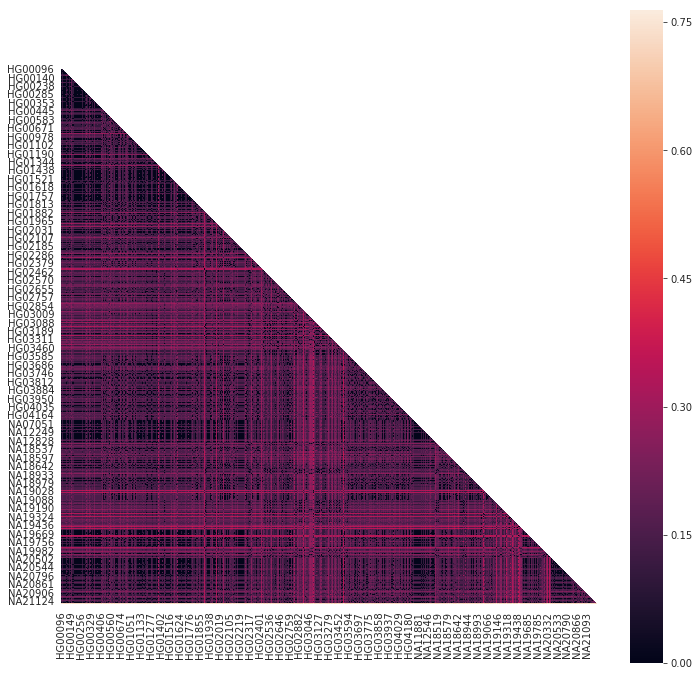

In [3]:
# load distance Matrix made in R 
dm2 = pd.read_csv('identityDist.csv', sep=',', index_col=0)
# Get the names of all the individuals from our Distance Matrix
names = list(dm2)

# Plot Distance Matrix
plt.figure(figsize=(12, 12))
mask = np.zeros_like(dm2)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(dm2, mask=mask, square=True)

In [14]:
# Create labels for the Graph
plot_cols = []
attributes = pd.read_csv('sorted.tsv', sep='\t', header=None)
attributes = attributes[[0, 4, 6]]
continents = list(attributes[6].unique())

cont_col = [f'rgb({np.random.randint(0,256)}, {np.random.randint(0,256)}, {np.random.randint(0,256)})' for _ in continents]

continent_cols = []
names2 = names.copy()
for i in range(len(names)-3):
    row = attributes.loc[attributes[0] == names[i]]

    reg = row[4].unique()[0]
    cont = row[6].unique()[0]
    
    names2[i] = f'{cont}, {reg}: {names[i]}'
    
    reg_index = regions.index(reg)
    cont_index = continents.index(cont)
    
    continent_cols.append(cont_col[cont_index])

plot_cols = continent_cols

# Append Denisovan Colours
plot_cols.append(cont_col[-1])
plot_cols.append(cont_col[-1])
plot_cols.append(cont_col[-1])

names2[-3] = f'Denisovan 3'
names2[-2] = f'Denisovan 4'
names2[-1] = f'Denisovan 8'

## Using Sci-kit Learn

### PCA

In [8]:
# Convert Distance Matrix into Euclidean Space
mds = MDS(n_components=len(names), dissimilarity="precomputed")
results = mds.fit(dm2)
coords = results.embedding_

In [9]:
# Perform PCA on our Distance Matrix
pca = PCA(n_components=2, copy=True, iterated_power='auto')
pca.fit(coords)
coords3 = pca.transform(coords)

In [4]:
# Plot the PCA results
x, y = coords[:, 0], coords[:, 1]

data = [
    go.Scatter(
        x=x,
        y=y,
        mode='markers',
        text=names, 
        marker=dict(color=plot_cols)
    )
]

layout = go.Layout(
    title='PCA Clustering',
    hovermode='closest'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, sharing='public', filename='PCA Clustering')

/home/paperspace/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### tSNE

In [11]:
# Perform t-SNE on our Distance Matrix
tsne = TSNE(n_components=2, metric='precomputed')
results2 = tsne.fit(dm2)

In [12]:
coords2 = results2.embedding_

In [5]:
# Plot t-SNE results
x, y = coords2[:, 0], coords2[:, 1]

data = [
    go.Scatter(
        x=x,
        y=y,
        mode='markers',
        text=names,
        marker=dict(color=plot_cols)
    )
]

layout = go.Layout(
    title='tSNE Clustering',
    hovermode='closest'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, sharing='public', filename='tSNE Identity')

/home/paperspace/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

